In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

def vega_payoff(initial_IV, changed_IV, vega):
    return (initial_IV - changed_IV) * vega

def plot_spread(st, values, strike, fig, ax, label):
    ax.spines['bottom'].set_position('zero')
    ax.plot(st, values, label=label)
    ax.plot(strike, 0, 'ro')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('stock price')
    ax.set_ylabel('P & L')

## Volatility 가 높을 때

ex) Netflex 는 2016 년 Jan 29 에 $91.15 에 close 되었다.  이것은 연초부터 현재까지 20% 하락한 것이다. 

2015 년에는 2 배 이상 뛰었었다. 주가가 계속 떨어질 것으로 예상하는 trader 는 $90 행사가의 2016 년 6월 만기 PUT 을 살 수 있다.

이 PUT 의 IV 는 2016 년 Jan 29 에 53% 였고, 가격은 $11.40 이었다.

이 것은 Netflex 가 $12.55 혹은 14% 하락해야 PUT position 에 수익이 난다는 뜻이다. 

이 전략은 단순하지만, expensive 하다. 따라서 trader 는 long PUT position 을 취하기 위한 cost 를 줄이기 위해 좀 더 out-of-the money 인 PUT 을 사거나, 더 낮은 가격의 PUT position 을 short 하여 cost 를 줄일 수 있는데 이 것이 bear put spread 로 알려진 전략이다.

Netflex 의 경우, trader 는 다음과 같이 position 을 취할 수 있다.

    1) 더 out-of-the money 인 Put   구매 : June $80 put 을 $7.15 에 BUY ($90 PUT 보다 $4.25 또는 37% 싸다) 

    2) $11.40  에 $90 PUT BUY, $7.15 에 $80 PUT SELL : net cost 는 $3.65  ==> Bear Put Spread

## Bear Put Spread - 주가가 계속 떨어질 것으로 예상

Max Profit =  5.75
Max Loss =  -4.25


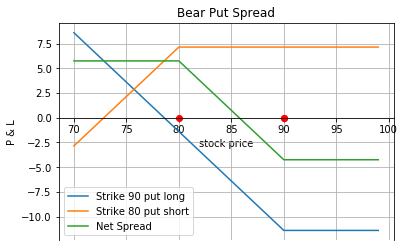

In [34]:
st = np.arange(70, 100, 1)
total_premium = 0
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike1 = 90
premium = 11.40
total_premium -= premium

payoff = put_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} put long'.format(strike1))
total_payoff += payoff

strike2 = 80
premium = 7.15
total_premium += premium

payoff = -put_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} put short'.format(strike2))
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Net Spread')

plt.title('Bear Put Spread');

print('Max Profit = ', max(total_payoff))
print('Max Loss = ', min(total_payoff))

# Call 매도 - 주가가 더 떨어질 것으로는 생각하지만 6 월 option 의 IV 수준이 축소될 것으로 생각하는 투자자

naked call 매도:

    6월물 $90 call 은 2016 년 Jan 29 에 $12.35 에 거래됨. 따라서, 12.35 프리미엄을 받고 call 매도.

Max Profit =  12.35
Max Loss =  -46.65


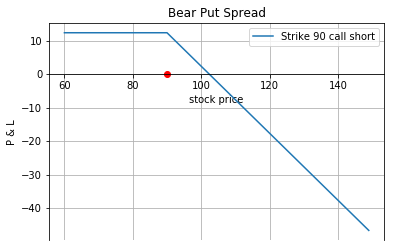

In [35]:
st = np.arange(60, 150, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

strike = 90
premium = 12.35
payoff = -call_payoff(st, strike, premium)
plot_spread(st, payoff, strike, fig, ax, 'Strike {} call short'.format(strike))
total_payoff += payoff

plt.title('Bear Put Spread');

print('Max Profit = ', max(total_payoff))
print('Max Loss = ', min(total_payoff))

    6월물 $90 call 의 vega 는 0.2216 임. short call 후 IV 가 54% 에서 40% 로 축소된다면 옵션 가격 하락은 $3.1 임. 그러나 naked call short 은 매우 risky 함. 주가가 6월 만기시점에 $150 으로 상승한다면 손실은 385% 이상이 됨.

In [36]:
vega_payoff(54, 40, 0.2216)

3.1024

In [37]:
-call_payoff(150, 90, 12.35, contracts=1, multiplier=1)

-47.65

# Short Straddle or Strangle

    straddle 은 동일한 행사가의 call 이나 put 을 동시에 팔아, short call 과 short put position 양쪽에서 premium 을 수수하는 것이다. 이 전략의 근거는 옵션 만기일에 따라 IV 가 크게 떨어질 것을 trader 가 기대하기 때문이다. 
    Netflix 6 월 $90 call 과 $90 put 을 팔아 premium $12.35 + $11.10 = $23.45 를 수수함.
    trader 는 6 월 만기까지 주식이 $90 strike price 가까이 머물기를 기대함.

Profit Inteval : 66.55 ~ 113.45
Max Profit =  23.45
Max Loss =  -16.549999999999997


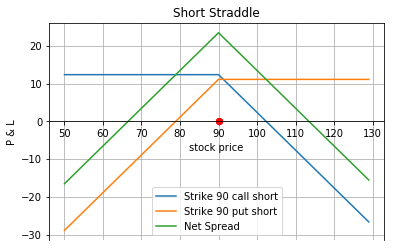

In [38]:
st = np.arange(50, 130, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 90
premium = 12.35
total_premium += premium

payoff = -call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
total_payoff += payoff

strike2 = 90
premium = 11.10
total_premium += premium

payoff = -put_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} put short'.format(strike2))
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Net Spread')

plt.title('Short Straddle');

print('Profit Inteval : {} ~ {}'.format(strike1-total_premium, strike2+total_premium))
print('Max Profit = ', max(total_payoff))
print('Max Loss = ', min(total_payoff))

    Short Strangle 은 short call 과 put 의 행사가가 서로 다른 것이 Straddle 과의 차이점이다. 일반적인 법칙은 call 행사가가 put 행사가보다 높은 것이다. 둘 다 out-of-money 이고 현재 주가에서 등간격으로 벌려 놓는다.
    Netflix 주가 $91.15 에서 6월물 $80 put 을 $6.75 에 매도하고 동시에 6 월물 $100 call 을 $8.20 에 매도하여 프리미엄 $14.95 를 수수한다. 낮은 수준의 프리미엄을 받음으로서 risk 를 어느정도 완화한다. 이 경우의 break-even 은 $65.05 와 $114.95 이다.

Profit Inteval : 65.05 ~ 114.95
Max Profit =  14.95
Max Loss =  -15.05


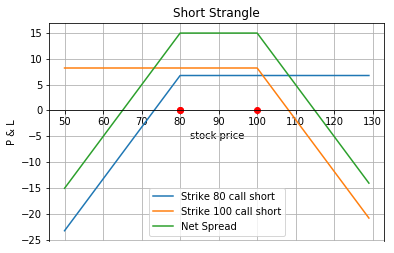

In [39]:
st = np.arange(50, 130, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 80
premium = 6.75
total_premium += premium

payoff = -put_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
total_payoff += payoff

strike2 = 100
premium = 8.20
total_premium += premium

payoff = -call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call short'.format(strike2))
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Net Spread')

plt.title('Short Strangle');

print('Profit Inteval : {} ~ {}'.format(strike1-total_premium, strike2+total_premium))
print('Max Profit = ', max(total_payoff))
print('Max Loss = ', min(total_payoff))

# Ratio Writing

    매입한 것 보다 더 많은 option 을 매도하는 것. 가장 간단한 전략은 2:1 비율로 한개 매입시 두개의 옵션을 매도하는 것이다. 근거는 만기일 이전에 IV 의 실질적인 하락을 자본화 하는 것이다.
    
    이 전략을 사용하는 trader 는 Netflex $90 call 을 $12.80 에 매입하고, $100 call 을 $8.20 에 두개 매도한다. 수수한 Net premium 은 $3.60 이된다. 이 전략은 bull call spread (6월물 $90 call 매수 + 6월물 $100 call 매도) 와 short call(6월물 $100 call) 과 같다고 보면 된다. 최대 이익은 만기일 직전에 $100 에 주가가 형성되면 얻어진다. 이 경우 $90 long call 은 $10 의 가치가 될 것지만 두개의 $100 short call 은 가치를 상실하고 만료된다. 따라서 최대 이익은 $10 + 프리미엄($13.6) 이다.

Max Profit = 13.60
Max Loss = -15.40


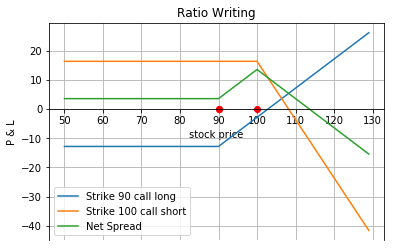

In [42]:
st = np.arange(50, 130, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 90
premium = 12.80
total_premium -= premium

payoff = call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call long'.format(strike1))
total_payoff += payoff

strike2 = 100
premium = 8.20
total_premium += premium * 2

payoff = -call_payoff(st, strike2, premium, contracts=2)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call short'.format(strike2))
total_payoff += payoff

plot_spread(st, total_payoff, strike1, fig, ax, 'Net Spread')

plt.title('Ratio Writing');

print('Max Profit = {:.2f}'.format(max(total_payoff)))
print('Max Loss = {:.2f}'.format(min(total_payoff)))

# Iron Condors

    동일 만기일의 bear call spread 와 bull put spread 를 조합하여, 변동성에서 벗어나 옵션 기간 중 좁은 범위의 trading 을 하는 것이다. iron condor 는 OTM call 을 팔고, 더 높은 call 을 사고, ITM put 을 팔고, 또다른 더 낮은 가격의 다른 put 을 사는 것이다. 일반적으로 콜들과 풋들의 행사가 차이는 동일하고 기초자산 주식의 주가와 동일한 거리만큼 떨어져 있다.
    Netflix 의 $95 call 을 팔고 $100 call 을 사서 net preminum 이 $1.45($10.15 - $8.70) 이 되도록 하고, 동시에 $85 put 을 팔고, $80 풋을 사서 net credit 이 $1.65($8.80 - $7.15) 가 되도록 한다. Total credit 은 $3.10 이 된다.
    이 전략의 최대 이익은 수수한 premium 이고 주가가 $85 와 $95 사이에서 옵션 만기가 되면 얻어진다. 최대 손실은 주식이 $100 call 행사가 이상이나 $80 put 행사가 밑으로 가면 발생한다. 이 경우 최대 손실은 call 과 put 옵션의 행사가 차이에서 수수한 프리미엄을 제외한 $1.90 이 된다.($5 - $3.10)
    Iron condor 는 상대적으로 낮은 payoff 를 갖지만 잠재적인 손실도 매우 제한적이다.

Max Profit = 3.10
Max Loss = -1.90


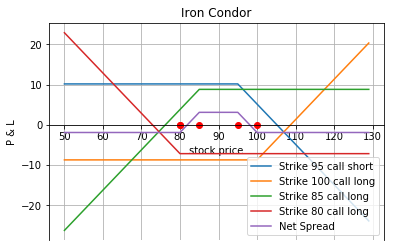

In [46]:
st = np.arange(50, 130, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 95
premium = 10.15
total_premium += premium

payoff = -call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
total_payoff += payoff

strike2 = 100
premium = 8.70
total_premium -= premium

payoff = call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call long'.format(strike2))
total_payoff += payoff

strike3 = 85
premium = 8.80
total_premium += premium

payoff = -put_payoff(st, strike3, premium)
plot_spread(st, payoff, strike3, fig, ax, 'Strike {} call long'.format(strike3))
total_payoff += payoff

strike4 = 80
premium = 7.15
total_premium -= premium

payoff = put_payoff(st, strike4, premium)
plot_spread(st, payoff, strike4, fig, ax, 'Strike {} call long'.format(strike4))
total_payoff += payoff

plot_spread(st, total_payoff, strike4, fig, ax, 'Net Spread')

plt.title('Iron Condor');

print('Max Profit = {:.2f}'.format(max(total_payoff)))
print('Max Loss = {:.2f}'.format(min(total_payoff)))